In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("C:/Users/silss/Downloads/netflix_titles.csv")
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [110]:
print(df.isnull().sum())# Check for any missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [111]:
#2.	Data Exploration:
#•	Explore the distribution of content types (Movies vs. TV Shows).
#•	Visualize the distribution of content types using a pie chart.


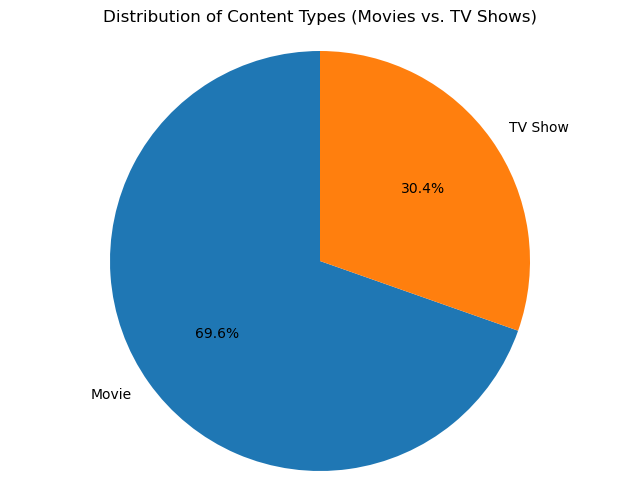

In [112]:
content_distribution = df['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(content_distribution, labels=content_distribution.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Content Types (Movies vs. TV Shows)')
plt.show()

In [113]:
#3.	Country Analysis:
#•	Analyze the distribution of shows based on countries.
#•	Visualize the top 10 countries with the highest number of shows using a bar plot.
#•	Question: Based on the country analysis, what are the top countries contributing to Netflix's content library? How might this information be useful for content acquisition strategies?

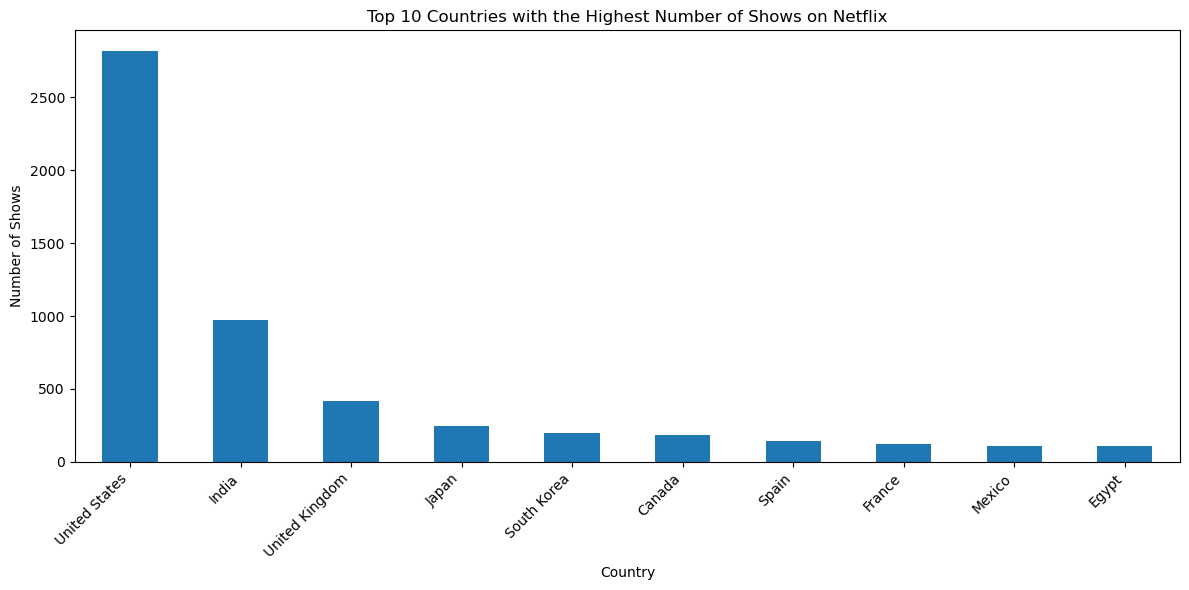

In [114]:
country_distribution = df['country'].value_counts().head(10)

# Visualize the top 10 countries with the highest number of shows using a bar plot
plt.figure(figsize=(12, 6))
country_distribution.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Top 10 Countries with the Highest Number of Shows on Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [115]:
#4.	Rating Analysis:
#•	Explore the distribution of content ratings.
#•	Visualize the distribution of content ratings using a count plot.
#•	Question: What are the most common content ratings on Netflix? How might this information influence the platform's recommendation algorithms and user preferences?

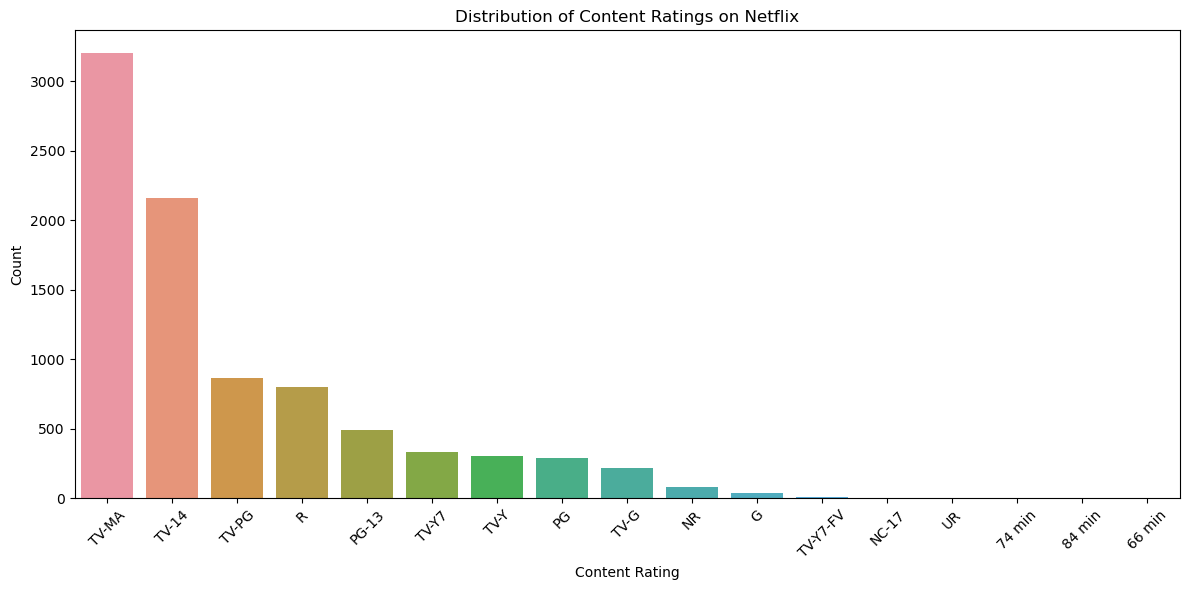

In [116]:
rating_distribution = df['rating'].value_counts()

# Visualize the distribution using a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=rating_distribution.index)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings on Netflix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [117]:
#5.	Release Year Analysis:
#•	Analyze the trend of shows released over the years.
#•	Visualize the number of shows released each year using a line plot.
#•	Question: What insights can be derived from the trend of show releases over the years? How might this information inform Netflix's content planning and marketing strategies?

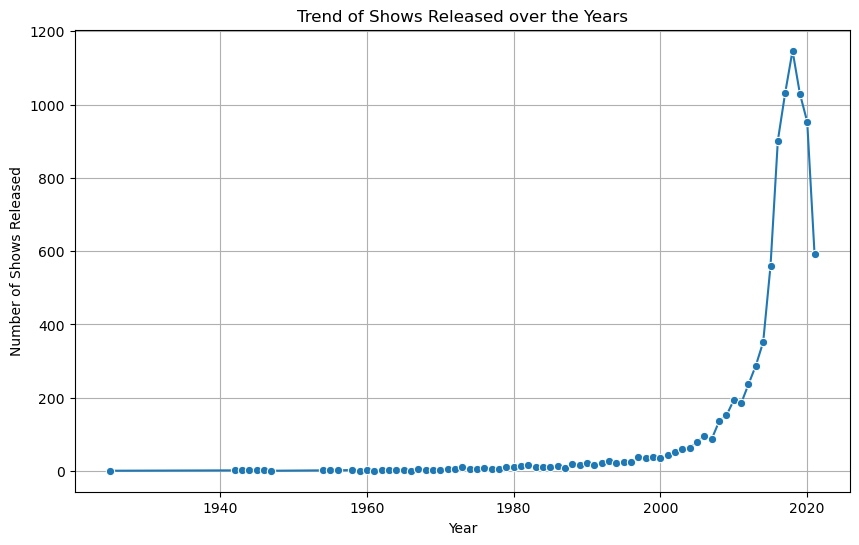

In [118]:
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

# Group the data by 'release_year' and count the number of shows released in each year
yearly_counts = df.groupby(df['release_year'].dt.year).size()

# Line plot to visualize the trend of shows released over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Shows Released')
plt.title('Trend of Shows Released over the Years')
plt.grid(True)
plt.show()

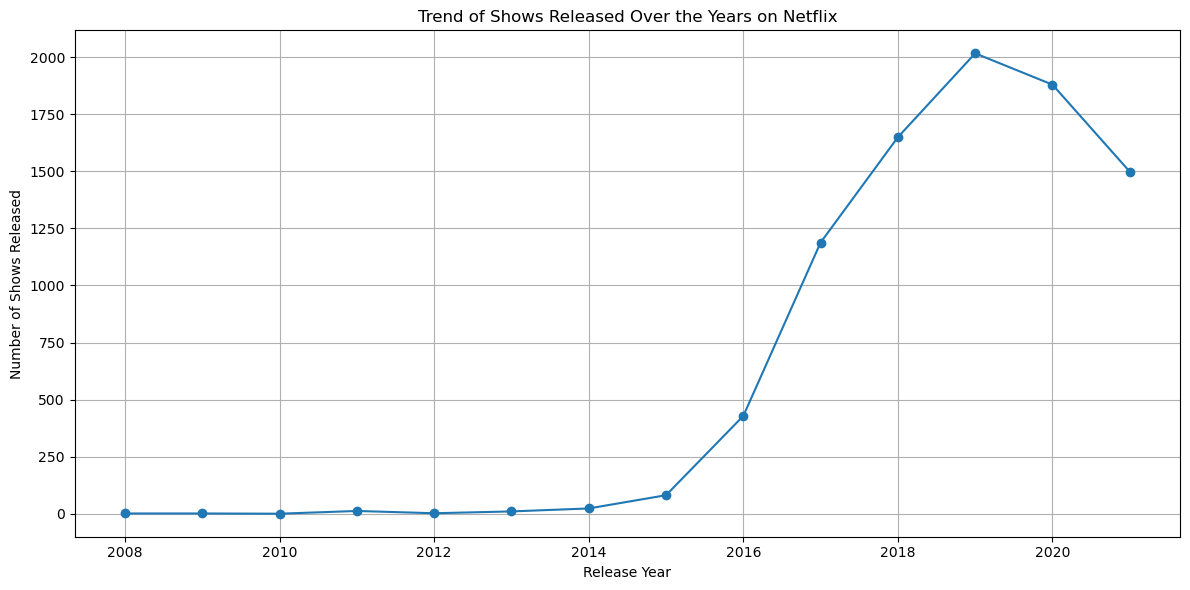

In [119]:
# gets the release year from 'date_added' column
df['release_year'] = df['date_added'].str[-4:].astype(float)

# looks the trend of shows released over the years
release_year_trend = df['release_year'].value_counts().sort_index()


# Visualize the number of shows released but concentraing more in the recent years
plt.figure(figsize=(12, 6))
release_year_trend.plot(kind='line', marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows Released')
plt.title('Trend of Shows Released Over the Years on Netflix')
plt.grid(True)
plt.tight_layout()
plt.show()

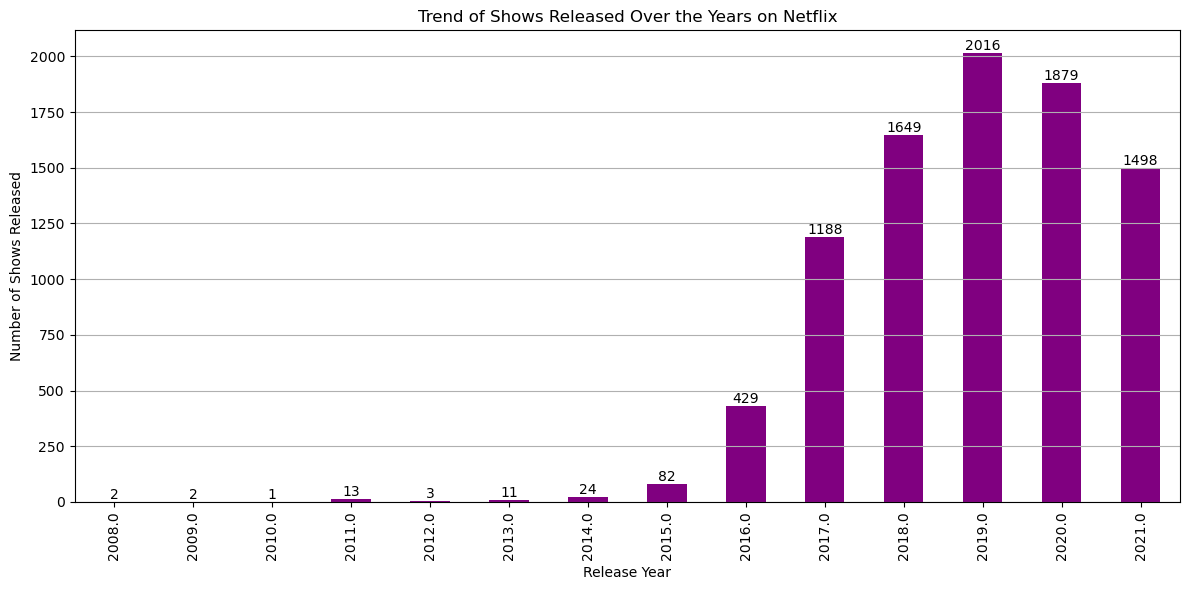

In [120]:
df['release_year'] = df['date_added'].str[-4:].astype(float)

release_year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = release_year_counts.plot(kind='bar', color='purple')

for bar in bars.patches:
    height = bar.get_height()# gets the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom') # display the count on top of each bar

plt.xlabel('Release Year')
plt.ylabel('Number of Shows Released')
plt.title('Trend of Shows Released Over the Years on Netflix')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [95]:
#6.	Duration Analysis:
#•	Analyze the distribution of show durations.
#•	Visualize the distribution of show durations using appropriate visualizations (histogram, box plot, etc.).
#•	Question: How do the durations of movies and TV shows vary? How might this impact user engagement and viewing behavior on the platform?

In [96]:
null_count = df['duration'].isnull().sum() #looks for nullvalues and gives the use the sum of them 
null_count

3

In [46]:
df['duration'] = df['duration'].fillna('0') #replece the null values with '0'.
null_count #checks for null values if there is still any 

0

In [60]:
mov_null = df['type'].isnull().sum()
mov_null #checks for any null values again

0

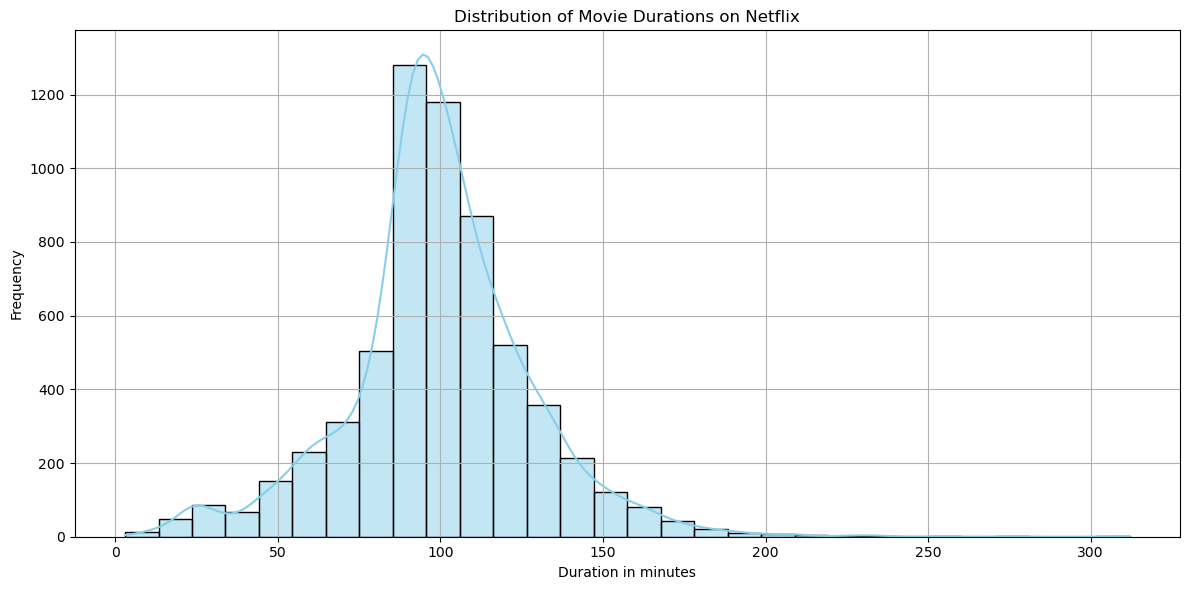

In [123]:
movie_durations = df[df['type'] == 'Movie']['duration'].str.replace(' min', '')
movie_durations = pd.to_numeric(movie_durations, errors='coerce')  # Convert to numeric, coerce errors to NaN

# Visualization for movie durations using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(movie_durations.dropna(), bins=30, kde=True, color='skyblue')  # Drop NaN values for visualization
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations on Netflix')
plt.grid(True)
plt.tight_layout()
plt.show()

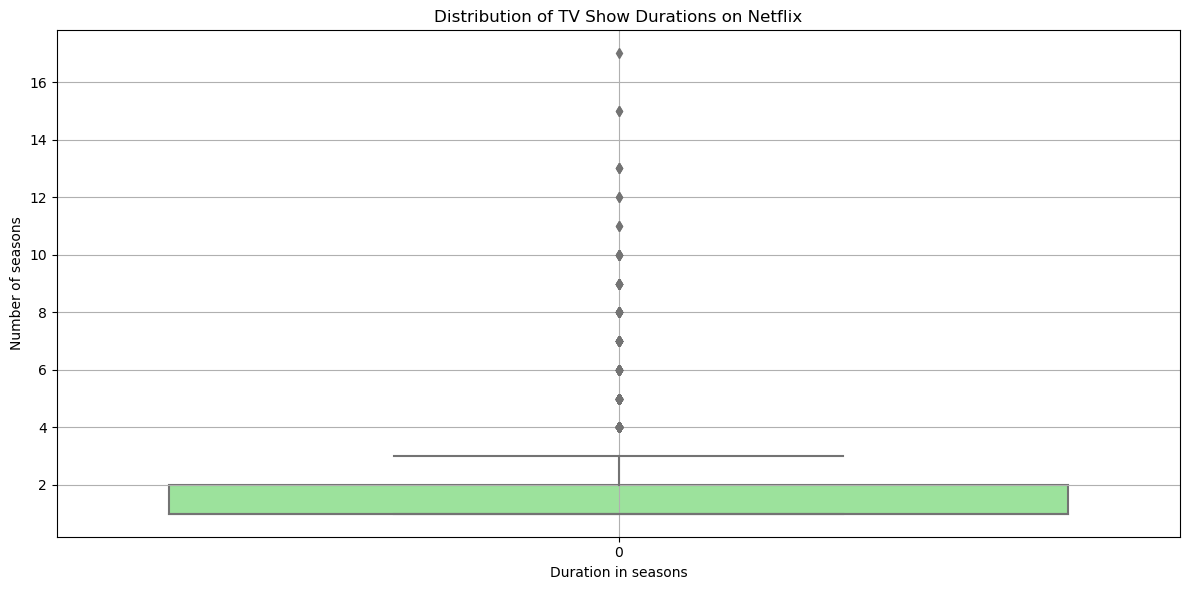

In [69]:
tv_durations = df[df['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(int)

# Visulization for TV show durations using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=tv_durations, color='lightgreen')
plt.xlabel('Duration in seasons')
plt.ylabel('Number of seasons')
plt.title('Distribution of TV Show Durations on Netflix')
plt.grid(True)
plt.tight_layout()
plt.show()


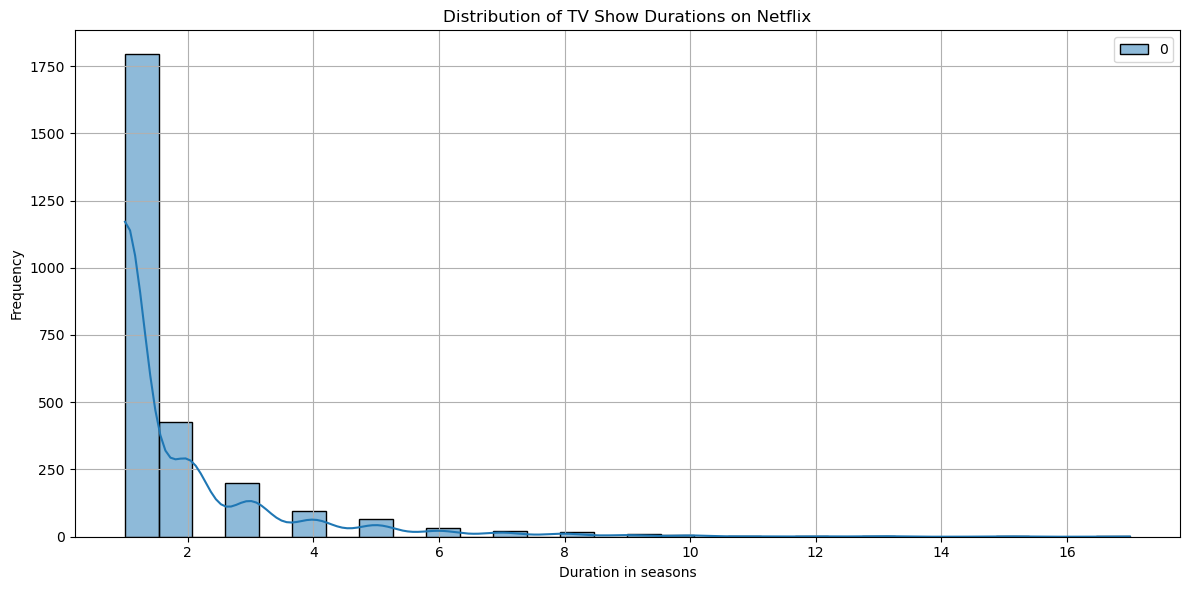

In [71]:
# Extract the durations of TV shows
tv_durations = df[df['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(int)

#histogram for TV show durations
plt.figure(figsize=(12, 6))
sns.histplot(data=tv_durations, bins=30, color='lightgreen', kde=True)
plt.xlabel('Duration in seasons')
plt.ylabel('Frequency')
plt.title('Distribution of TV Show Durations on Netflix')
plt.grid(True)
plt.tight_layout()
plt.show()